Project 1

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the dataset
file_path = r"C:\Users\debja\OneDrive\Desktop\DA Python Pandas Projects\Main Flow Internship tasks\Task 2\Project 1\store_sales.csv"
data = pd.read_csv(file_path, encoding="latin1")

In [18]:
# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             51290 non-null  object 
 1   Country          51290 non-null  object 
 2   CustomerID       51290 non-null  object 
 3   CustomerName     51290 non-null  object 
 4   Market           51290 non-null  object 
 5   OrderID          51290 non-null  object 
 6   ProductID        51290 non-null  object 
 7   ProductName      51290 non-null  object 
 8   Profit           51290 non-null  float64
 9   Quantity         51290 non-null  int64  
 10  Region           51290 non-null  object 
 11  Sales            51290 non-null  int64  
 12  Segment          51290 non-null  object 
 13  ShippingCost     51290 non-null  float64
 14  State            51290 non-null  object 
 15  SubCategory      51290 non-null  object 
 16  Year             51290 non-null  int64  
 17  Price_each_i

In [20]:
# Check for missing values
missing_values = data.isnull().sum()

In [22]:
# Output the basic info, first few rows, and missing values summary
data_info, data_head, missing_values

(None,
           City        Country CustomerID      CustomerName Market  \
 0  Los Angeles  United States  LS-172304  Lycoris Saunders     US   
 1  Los Angeles  United States  MV-174854     Mark Van Huff     US   
 2  Los Angeles  United States  CS-121304      Chad Sievert     US   
 3  Los Angeles  United States  CS-121304      Chad Sievert     US   
 4  Los Angeles  United States  AP-109154    Arthur Prichep     US   
 
           OrderID        ProductID  \
 0  CA-2011-130813  OFF-PA-10002005   
 1  CA-2011-148614  OFF-PA-10002893   
 2  CA-2011-118962  OFF-PA-10000659   
 3  CA-2011-118962  OFF-PA-10001144   
 4  CA-2011-146969  OFF-PA-10002105   
 
                                          ProductName   Profit  Quantity  \
 0                                          Xerox 225   9.3312         3   
 1          Wirebound Service Call Books, 5 1/2" x 4"   9.2928         2   
 2  Adams Phone Message Book, Professional, 400 Me...   9.8418         3   
 3                             

In [24]:
# Step 1: Remove duplicates
duplicates_count = data.duplicated().sum()
data_cleaned = data.drop_duplicates()

In [26]:
# Step 2: Detect and handle outliers using the Interquartile Range (IQR) method for numerical columns
numerical_columns = data_cleaned.select_dtypes(include=["float64", "int64"]).columns

In [28]:
# Calculate Q1, Q3, and IQR
Q1 = data_cleaned[numerical_columns].quantile(0.25)
Q3 = data_cleaned[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

In [30]:
# Define outlier thresholds (1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [32]:
# Filter out outliers
data_no_outliers = data_cleaned[
    ~((data_cleaned[numerical_columns] < lower_bound) | (data_cleaned[numerical_columns] > upper_bound)).any(axis=1)
]

In [34]:
# Count of rows removed due to outliers
outliers_removed = data_cleaned.shape[0] - data_no_outliers.shape[0]

In [36]:
# Output the results
duplicates_count, outliers_removed, data_no_outliers.shape

(0, 12855, (38435, 18))

In [38]:
# Step 3: Statistical analysis
# Calculate mean, median, standard deviation, and variance for numerical columns
statistics_summary = data_no_outliers[numerical_columns].describe().T

In [40]:
# Calculate correlations between numerical columns
correlations = data_no_outliers[numerical_columns].corr()

In [42]:
# Output statistical summary and correlation matrix
statistics_summary, correlations

(                   count         mean        std       min      25%      50%  \
 Profit           38435.0    11.680483  24.041350   -55.125     0.56     7.20   
 Quantity         38435.0     3.081722   1.878651     1.000     2.00     3.00   
 Sales            38435.0    86.725719  93.073931     0.000    23.00    52.00   
 ShippingCost     38435.0     8.672382  10.142329     0.002     1.91     4.80   
 Year             38435.0  2012.782542   1.096177  2011.000  2012.00  2013.00   
 Price_each_item  38435.0    32.449080  34.878045     0.000     9.40    19.33   
 
                       75%        max  
 Profit             21.150    91.9954  
 Quantity            4.000     9.0000  
 Sales             117.000   581.0000  
 ShippingCost       11.330    57.2000  
 Year             2014.000  2014.0000  
 Price_each_item    43.885   187.0000  ,
                    Profit  Quantity     Sales  ShippingCost      Year  \
 Profit           1.000000  0.172681  0.460324      0.397252 -0.002848   
 Q

In [44]:
# Set a style for the plots
sns.set_style("whitegrid")

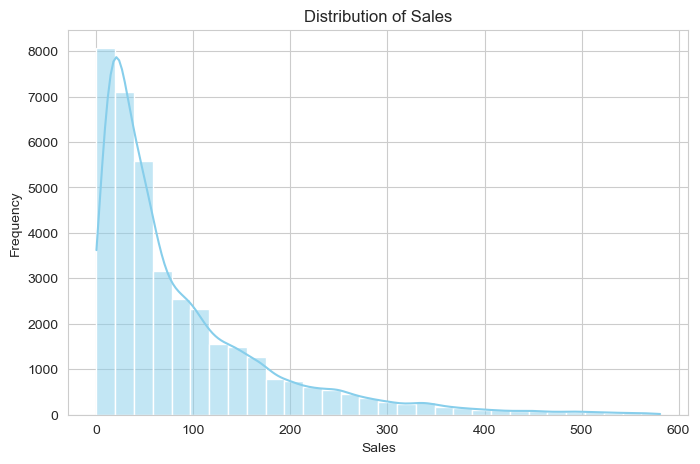

In [49]:
# Step 4: Data visualization

# Histogram for Sales
plt.figure(figsize=(8, 5))
sns.histplot(data_no_outliers["Sales"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

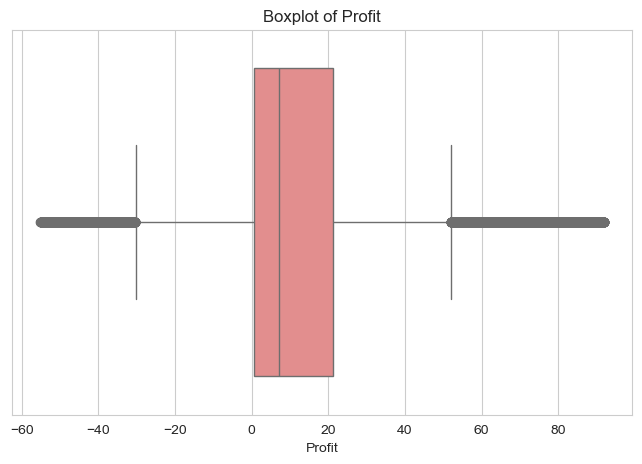

In [51]:
# Boxplot for Profit to identify outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_no_outliers["Profit"], color="lightcoral")
plt.title("Boxplot of Profit")
plt.xlabel("Profit")
plt.show()

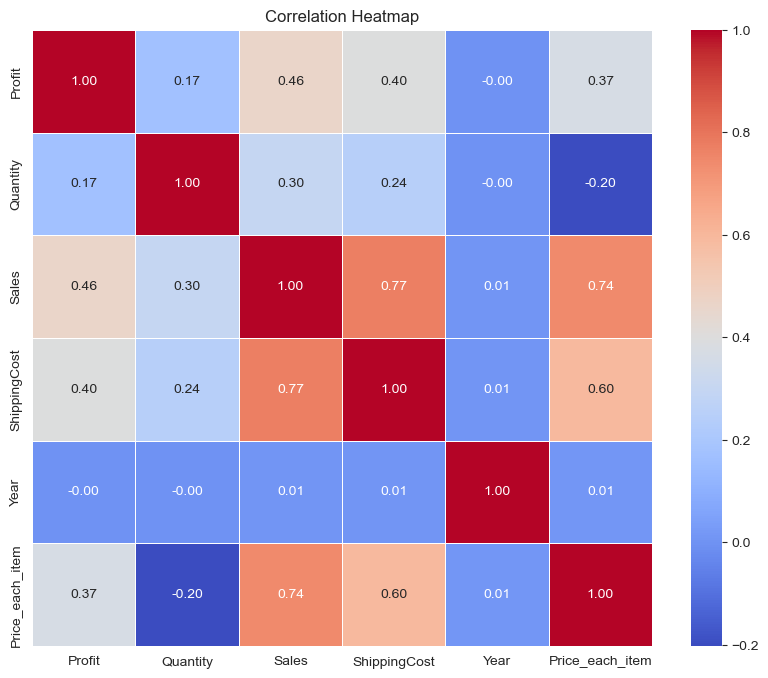

In [53]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()